### 使用RNN, LSTM对Google股票预测

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import os

In [0]:
path = os.path.join('drive', 'My Drive', 'KGP Talkie', 'GOOG.csv')

In [4]:
data = pd.read_csv(path)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3808,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1021092


In [5]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [6]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200


In [0]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [8]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [0]:
X_train = []
y_train = []

In [0]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape, y_train.shape

((3557, 60, 5), (3557,))

### 建立模型

In [13]:
model = Sequential()


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
112/112 [==============================] - 37s 334ms/step - loss: 0.0125
Epoch 2/10
112/112 [==============================] - 38s 342ms/step - loss: 0.0020
Epoch 3/10
112/112 [==============================] - 39s 346ms/step - loss: 0.0017
Epoch 4/10
112/112 [==============================] - 38s 336ms/step - loss: 0.0015
Epoch 5/10
112/112 [==============================] - 39s 344ms/step - loss: 0.0016
Epoch 6/10
112/112 [==============================] - 39s 347ms/step - loss: 0.0015
Epoch 7/10
112/112 [==============================] - 38s 339ms/step - loss: 0.0014
Epoch 8/10
112/112 [==============================] - 39s 345ms/step - loss: 0.0013
Epoch 9/10
112/112 [==============================] - 39s 346ms/step - loss: 0.0013
Epoch 10/10
112/112 [==============================] - 40s 354ms/step - loss: 0.0012


### 预测

In [0]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)
past_60_days = data_training.tail(60)

In [19]:
data_test = data_test.drop(['Date', 'Adj Close'], axis = 1)
df = past_60_days.append(data_test, ignore_index = True)
df

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700
...,...,...,...,...,...
247,1220.969971,1226.000000,1212.300049,1219.000000,1404100
248,1219.000000,1231.229980,1203.579956,1205.099976,1273500
249,1196.979980,1196.979980,1171.290039,1176.630005,1615100
250,1180.000000,1189.060059,1162.430054,1187.829956,1621200


In [20]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df.shape

(252, 5)

In [0]:
inputs = df

In [0]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
  x_test.append(inputs[i-60: i])
  y_test.append(inputs[i, 0])

In [23]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((192, 60, 5), (192,))

In [0]:
y_pred = model.predict(x_test)

In [25]:
y_pred

array([[0.18176255],
       [0.17393605],
       [0.16748786],
       [0.16267297],
       [0.15986261],
       [0.15945998],
       [0.16159596],
       [0.16600366],
       [0.17214796],
       [0.17929041],
       [0.18695444],
       [0.19502276],
       [0.20352295],
       [0.2126149 ],
       [0.22209242],
       [0.23162383],
       [0.2408571 ],
       [0.24970749],
       [0.25797176],
       [0.26537877],
       [0.2719044 ],
       [0.2779504 ],
       [0.28399745],
       [0.2905017 ],
       [0.2978391 ],
       [0.3061302 ],
       [0.31496936],
       [0.32382384],
       [0.33226877],
       [0.3402129 ],
       [0.34780738],
       [0.35519713],
       [0.3624152 ],
       [0.36943337],
       [0.3761682 ],
       [0.38232505],
       [0.38772166],
       [0.39231694],
       [0.39613232],
       [0.3992752 ],
       [0.40191442],
       [0.40443194],
       [0.40729958],
       [0.41104642],
       [0.41609728],
       [0.42243412],
       [0.4296828 ],
       [0.437

In [26]:
scaler.scale_

array([3.33222286e-03, 3.49980700e-03, 3.37626754e-03, 3.21171650e-03,
       1.81307225e-07])

In [27]:
# 还原数据
scale = 1/3.33222286e-03
scale

300.0999759061733

In [0]:
y_pred = y_pred * scale
y_test = y_test * scale

### 可视化

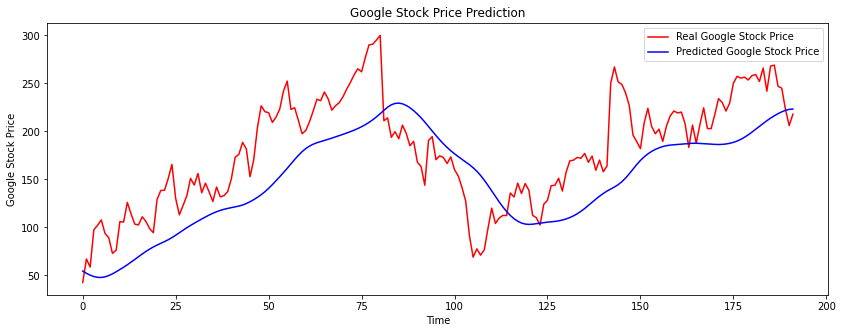

In [29]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()